#Разведочный анализ данных

Импортируем библиотеки, считываем данные, смотрим первые 5 строк, а также информацию о колонках

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.shape

(4177, 9)

В таблице содержится 4177 объектов, каждый имеет 9 признаков. Практически все признаки - числовые. Исключение - пол. Но в данном случае пол - не бинарный признак, поэтому закодировать его нулем и единицей не получится. Целевая переменная имеет тип int. Решается задача регрессии. В колонках Diameter, Whole weight, Shell weight содержится небольшое количество пропусков. В дальнейшем будет принята стратегия заполнения этих пропусков.

Посмотрим основные числовые характеристики

In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


В столбце Height минимальное значение равно 0.0. Скорее всего, это ошибка. Один из размеров не может быть равен нулю

In [ ]:
len(df[df.Height == 0])

2

Удалим эти значения

In [ ]:
df = df[df.Height != 0]
df.shape

(4175, 9)

Заполним пропуски в колонках Diameter, Whole weight, Shell weight средним значением

In [ ]:
mean_diameter = df['Diameter'].mean()

df['Diameter'].fillna(mean_diameter, inplace=True)

In [ ]:
mean_whole_weight = df['Whole weight'].mean()

df['Whole weight'].fillna(mean_whole_weight, inplace=True)

In [ ]:
mean_shell_weight = df['Shell weight'].mean()

df['Shell weight'].fillna(mean_shell_weight, inplace=True)

In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.407900,0.139583,0.827574,0.359476,0.180653,0.239075,9.935090
std,0.120069,0.098081,0.041725,0.484458,0.221954,0.109605,0.138117,3.224227
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.447500,0.186250,0.093500,0.131500,8.000000
50%,0.545000,0.420000,0.140000,0.812000,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.141750,0.502000,0.253000,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


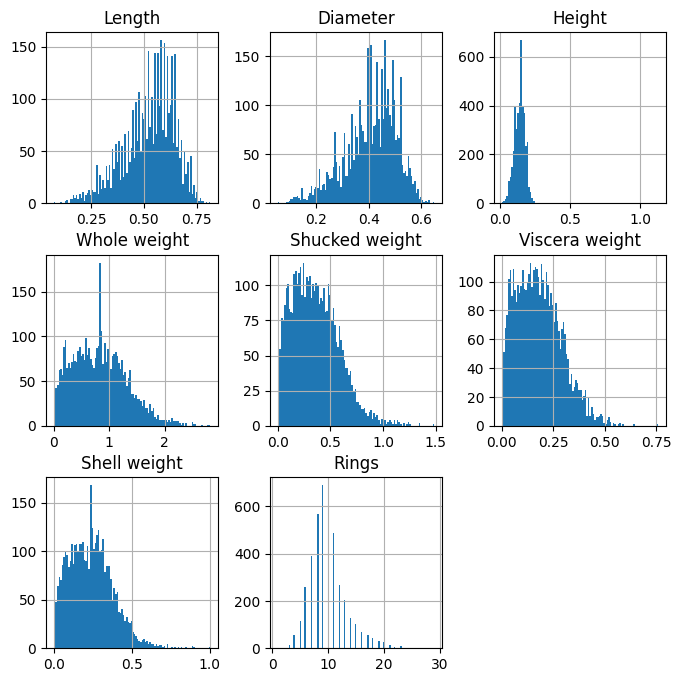

In [ ]:
df.hist(bins=100, figsize=(8,8));

Распределения размеров ракушек напоминают нормальное. Распределения весовых характеристик смещены влево и имеют небольшие хвосты справа. Это может привести к тому, что модель будет плохо предсказывать значения целевой переменной на крупных, относительно тяжелых ракушках.

In [ ]:
df.Sex.value_counts()

M    1447
I    1276
F    1259
f     195
Name: Sex, dtype: int64

В столбце Sex обнаружено 4 категории, тогда как в описании датасета были описаны 3 категории. Очевидно, что F и f - это одна категория. Исправим эту неточность

In [ ]:
df['Sex'] = df['Sex'].apply(lambda x: 'F' if x == 'f' else x)
df.Sex.value_counts()

F    1454
M    1447
I    1276
Name: Sex, dtype: int64

Посмотрим, есть ли связь между полом ракушки и ее возрастом

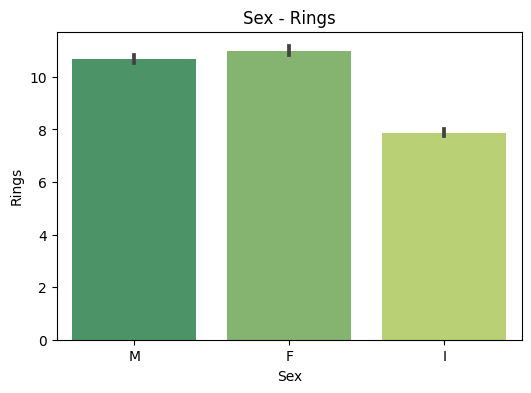

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Sex', y='Rings', data = df, palette='summer')
plt.title('Sex - Rings')
plt.show();

Очевидно, что ракушки со значением infant младше, чем ракушки male и female

In [ ]:
df.duplicated().sum()

0

Строк-двойников в датасете не обнаружено

Посмотрим связь числовых характеристик ракушек с целевой переменной

In [ ]:
columns = df.columns
columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
columns = columns[1:-1]
columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

0.5564643758735189


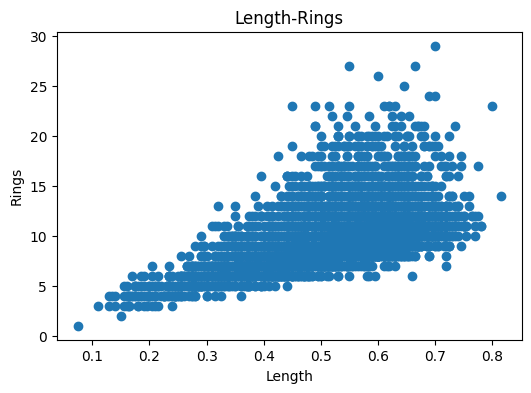

0.5633246894782983


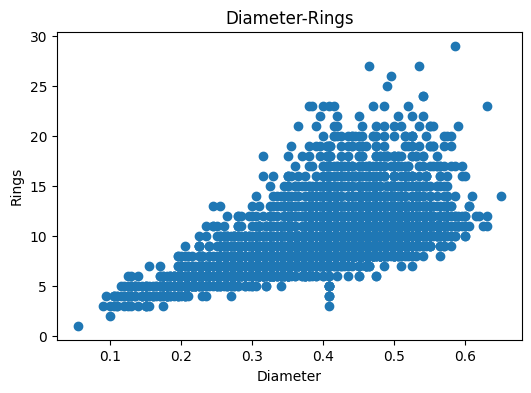

0.5576245544855888


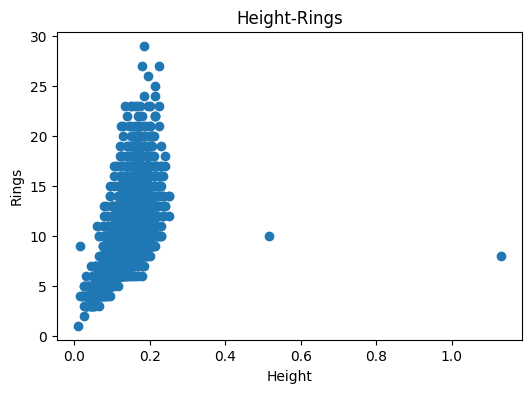

0.5321199983456559


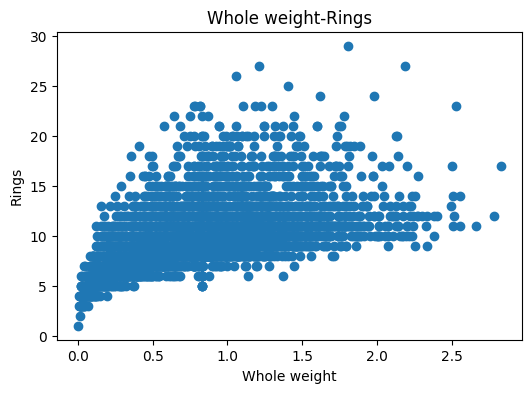

0.42059739391710504


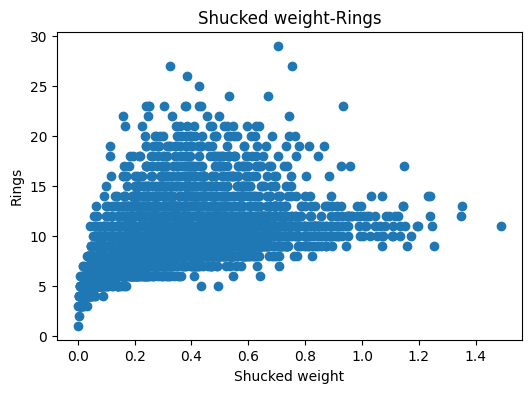

0.5035622312738298


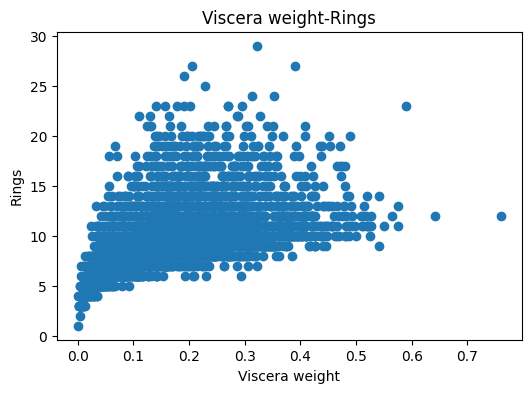

0.6224698056139003


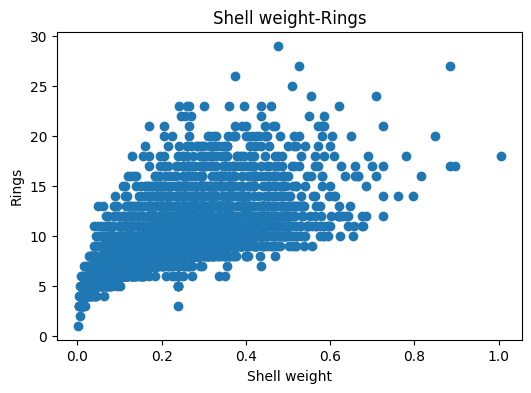

In [ ]:
for i in columns:
  print(np.corrcoef(df[i], df.Rings)[0][1])
  plt.figure(figsize=(6,4))
  plt.scatter(df[i], df.Rings)
  plt.xlabel(i)
  plt.ylabel('Rings')
  plt.title(f'{i}-Rings')
  plt.show()

Коэффициент корреляции каждого числового признака с целевой переменной находится в промежутке от 0.42 до 0.62. В целом, по графикам зависимость прослеживается. Кроме того, судя по графику Height-Rings, в столбце Height есть 2 очевидных выброса. Их также стоит удалить.
На графиках с весовыми характеристиками при увеличении значения признака расположение точек становится более разряженным. Однако, будем считать, что это не выбросы. Редкой ракушке удается достичь крупных размеров и большой массы, но все же это возможно

In [ ]:
len(df[df.Height > 0.4])

2

In [ ]:
df = df[df.Height < 0.4]
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,0.524038,0.407875,0.139256,0.827299,0.359304,0.180595,0.239035,9.935538
std,0.120061,0.098071,0.038378,0.484088,0.221705,0.109525,0.138075,3.224861
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.447500,0.186000,0.093500,0.131500,8.000000
50%,0.545000,0.420000,0.140000,0.812000,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.141500,0.502000,0.253000,0.325000,11.000000
max,0.815000,0.650000,0.250000,2.825500,1.488000,0.760000,1.005000,29.000000


Посмотрим, влияет ли пол ракушки на ее средние размеры

In [ ]:
df.groupby('Sex').agg(LengthMean=('Length','mean'),
                      DiameterMean=('Diameter', 'mean'),
                      HeightMean=('Height', 'mean')).sort_values(by='LengthMean', ascending=False)

,LengthMean,DiameterMean,HeightMean
Sex,,,
F,0.573059,0.448293,0.155289
M,0.559959,0.437641,0.150595
I,0.427359,0.327993,0.108100


In [ ]:
df.groupby('Sex').agg(Whole_weight_Mean=('Whole weight','mean'),
                      Shucked_weight_Mean=('Shucked weight', 'mean'),
                      Viscera_weight_Mean=('Viscera weight', 'mean'),
                      Shell_weight_Mean=('Shell weight', 'mean')).sort_values(by='Whole_weight_Mean', ascending=False)

,Whole_weight_Mean,Shucked_weight_Mean,Viscera_weight_Mean,Shell_weight_Mean
Sex,,,,
F,1.018560,0.437507,0.225200,0.294747
M,0.977247,0.429413,0.213991,0.279304
I,0.438971,0.190538,0.091818,0.129788


По всем признакам у ракушек Female наблюдается незначительное превосходство в сотых долях величины, по сравнению с Male. Infant ракушки значительно уступают по всем признакам Male и Female, что неудивительно

Корреляции также можно оценить с помощью матриц корреляций

<ipython-input-29-4556f243dd88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

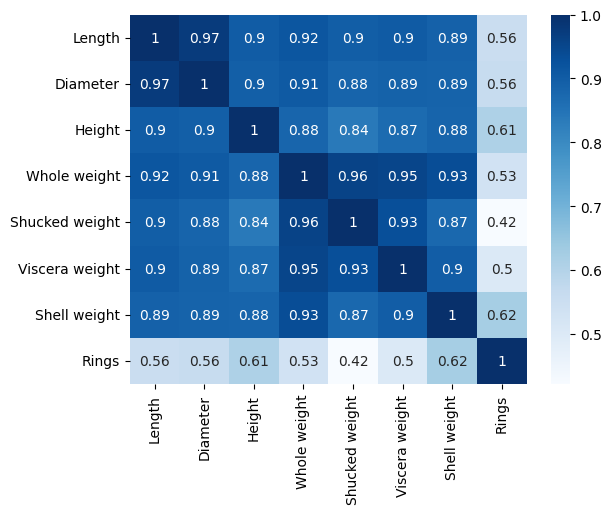

In [ ]:
corr = df.corr()

sns.heatmap(corr, cmap="Blues", annot=True)

Все величины достаточно сильно коррелируют друг с другом. А вот с целевой переменной корреляции слабее, но они все же значимы

Можно также посмотреть на корреляцию Спирмена

<ipython-input-31-ce0016022913>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


<Axes: >

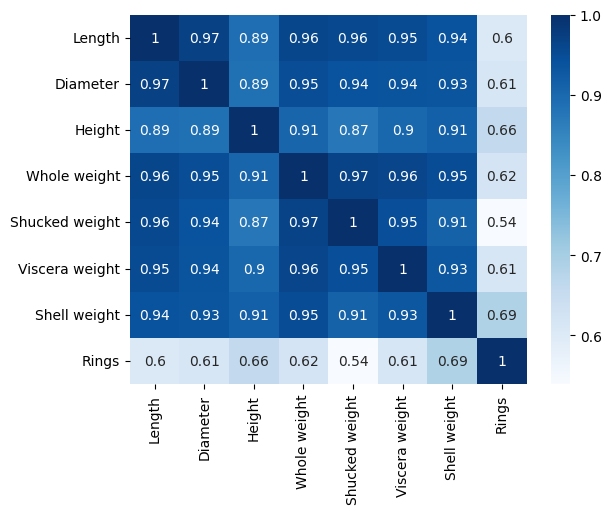

In [ ]:
corr = df.corr(method='spearman')

sns.heatmap(corr, cmap="Blues", annot=True)

В целом, обе матрицы корреляций имеют схожие, большие значения. А значит, при построении модели машинного обучения имеет смысл использовать все имеющиеся признаки

В датасете имеется один категориальный признак - Sex. Значит, имеет смысл посмотреть корреляцию ANOVA, которая используется для нахождения аналога корреляции между числовым и категориальным признаками

In [ ]:
!pip install scipy -q

In [ ]:
from scipy.stats import f_oneway

Data = []

for c1 in columns:
    CategoryGroupLists = df.groupby('Sex')[c1].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    if AnovaResults[1] >= 0.05:
        Data.append({'Category' : 'Sex', 'Numerical' : c1, 'Is correlated' : 'No'})
    else:
        Data.append({'Category' : 'Sex', 'Numerical' : c1, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes


Согласно методу, корреляция числовых признаков с полом есть

Посмотрим отдельно на распределение целевой переменной

<Axes: xlabel='Rings', ylabel='Count'>

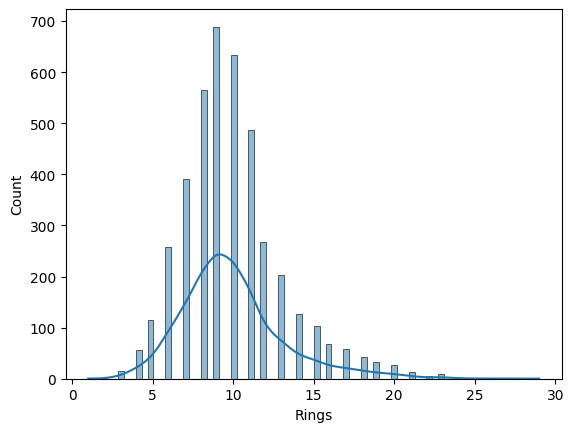

In [ ]:
sns.histplot(data = df['Rings'], kde = True)

Распределение похоже на нормальное, однако имеется небольшой хвост справа. Логично, что имеется небольшое количество достаточно взрослых, или даже старых ракушек. Они и создают этот небольшой хвост. Для нас имеет значение, что на старых ракушках, скорее всего, модель будет ошибаться больше. А значит, общая ошибка модели получится больше

Запишем очищенные данные в файл, чтобы в дальнейшем обучить на них модель

In [ ]:
df.to_csv("clean_abalone.csv", index=False)

Сравним скорость работы библиотек pandas и polars

In [ ]:
df_big = df.copy()

for i in range(300):
  df_big = pd.concat([df_big, df])

df_big.to_csv("abalone_big.csv", index=False)

In [ ]:
df_big.shape

(1256073, 9)

In [ ]:
!pip install polars

import polars as pl

print(pl.__version__)

0.17.3


Загрузка данных

In [ ]:
%%time

df_pl = pl.read_csv("abalone_big.csv")

CPU times: user 918 ms, sys: 153 ms, total: 1.07 s
Wall time: 566 ms


In [ ]:
%%time

df_pd = pd.read_csv("abalone_big.csv")

CPU times: user 883 ms, sys: 71.9 ms, total: 955 ms
Wall time: 955 ms


Скорость загрузки варьируется от запуска к запуску, однако в среднем polars загружает данные вдвое быстрее, чем pandas

Фильтрация данных

In [ ]:
%%time

df_pd[(df_pd.Length > 0.5) & (df_pd['Shell weight'] < 0.2)]

CPU times: user 20.6 ms, sys: 0 ns, total: 20.6 ms
Wall time: 23 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
50,I,0.520,0.4100,0.120,0.5950,0.2385,0.1110,0.1900,8
59,F,0.505,0.4000,0.125,0.5830,0.2460,0.1300,0.1750,7
61,M,0.505,0.4050,0.110,0.6250,0.3050,0.1600,0.1750,9
64,M,0.520,0.4079,0.120,0.5800,0.2340,0.1315,0.1850,8
115,F,0.530,0.4150,0.115,0.5915,0.2330,0.1585,0.1800,11
...,...,...,...,...,...,...,...,...,...
1255975,M,0.550,0.3850,0.130,0.7275,0.3430,0.1625,0.1900,8
1256007,I,0.515,0.4000,0.140,0.7165,0.3495,0.1595,0.1785,8
1256021,I,0.540,0.4150,0.135,0.7090,0.3195,0.1740,0.1850,9
1256064,F,0.515,0.4000,0.125,0.6150,0.2865,0.1230,0.1765,8


In [ ]:
%%time

df_pl.filter((pl.col('Length') > 0.5) & (pl.col('Shell weight') < 0.2))

CPU times: user 21.3 ms, sys: 0 ns, total: 21.3 ms
Wall time: 28.1 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""I""",0.52,0.41,0.12,0.595,0.2385,0.111,0.19,8
"""F""",0.505,0.4,0.125,0.583,0.246,0.13,0.175,7
"""M""",0.505,0.405,0.11,0.625,0.305,0.16,0.175,9
"""M""",0.52,0.4079,0.12,0.58,0.234,0.1315,0.185,8
"""F""",0.53,0.415,0.115,0.5915,0.233,0.1585,0.18,11
"""F""",0.51,0.4,0.14,0.8145,0.459,0.1965,0.195,10
"""M""",0.55,0.41,0.125,0.7605,0.2505,0.1635,0.195,14
"""F""",0.505,0.375,0.18,0.568,0.2325,0.1495,0.17,12
"""F""",0.515,0.405,0.12,0.646,0.2895,0.1405,0.177,10


При фильтрации данных скорость работы pandas и polars примерно одинакова. Иногда быстрее работает одна библиотека, иногда другая. Возможно, чтобы точнее оценить скорость работы фильтрации в этих библиотеках, нужен более объемный датасет

Агрегация данных

In [ ]:
%%time

df_pd.groupby('Sex').agg({'Height' : 'mean', 'Rings' : 'max'})

CPU times: user 88 ms, sys: 0 ns, total: 88 ms
Wall time: 90.2 ms


,Height,Rings
Sex,,
F,0.155289,29
I,0.108100,21
M,0.150595,27


In [ ]:
%%time

df_pl.groupby('Sex').agg([pl.mean('Height'), pl.max('Rings')])

CPU times: user 90.2 ms, sys: 0 ns, total: 90.2 ms
Wall time: 54.5 ms


Sex,Height,Rings
str,f64,i64
"""I""",0.1081,21
"""M""",0.150595,27
"""F""",0.155289,29


Агрегация данных сработала в среднем, в полтора раза быстрее в бибилиотеке polars